In [260]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [261]:
def animalDF(file):
    df = pd.read_csv(file)
    print(df.info())
    return df

In [262]:
animals = animalDF('files/train.csv')
train = animalDF('files/train.csv')
test = animalDF('files/test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed           

## Exploratory

### Missing Data

In [263]:
animals.isnull().any(axis=0)

AnimalID          False
Name               True
DateTime          False
OutcomeType       False
OutcomeSubtype     True
AnimalType        False
SexuponOutcome     True
AgeuponOutcome     True
Breed             False
Color             False
dtype: bool

Here we can see that the columns 'Name', 'OutcomeSubtype', 'SexuponOutcome', and 'AgeuponOutcome' all have missing values. 

In [264]:
animals['Name'] = animals['Name'].fillna('No name')
animals['OutcomeSubtype'] = animals['OutcomeSubtype'].fillna('Unknown')
animals['SexuponOutcome'] = animals['SexuponOutcome'].fillna('Unknown')
animals['AgeuponOutcome'] = animals['AgeuponOutcome'].fillna('1 year')
train['Name'] = train['Name'].fillna('No name')
train['OutcomeSubtype'] = train['OutcomeSubtype'].fillna('Unknown')
train['SexuponOutcome'] = train['SexuponOutcome'].fillna('Unknown')
train['AgeuponOutcome'] = train['AgeuponOutcome'].fillna('1 year')
test['Name'] = test['Name'].fillna('No name')
test['SexuponOutcome'] = test['SexuponOutcome'].fillna('Unknown')
test['AgeuponOutcome'] = test['AgeuponOutcome'].fillna('1 year')

First I would like to see the different type of animals that are in this data set, as well as their outcomes.

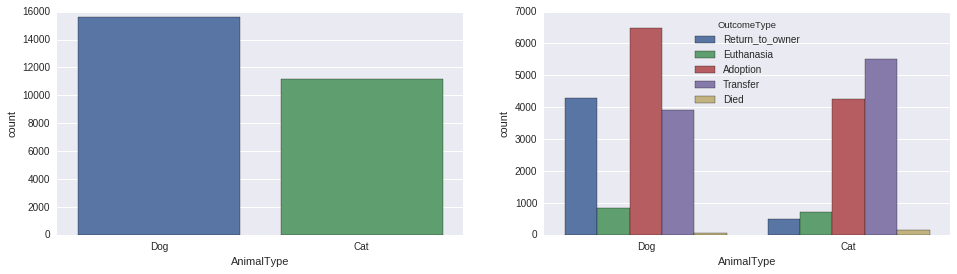

In [265]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='AnimalType', ax=ax1)
sns.countplot(data=animals, x='AnimalType', hue='OutcomeType',ax=ax2)

Here we can see that the only two types of animals that are in this data set are dogs and cats. According to the graph, we can see that both dogs and cats are likely to be adopted or transferred. It also seems that dogs are more likely to be returned to it's owners.

In [266]:
def colorSplit(x):
    x = str(x)
    
    if x.find('/') >= 0:
        split = x.split('/')
        return split[0]
    else:
        return x
    
def colorSplit1(x):
    x = str(x)
    if x.find(' ') >= 0 or x.find(' ') == True:
        split = x.split(' ')
        return split[0]
    else:
        return x   

In [267]:
animals['Color'] = animals['Color'].apply(colorSplit)
animals['Color'] = animals['Color'].apply(colorSplit1)
train['Color'] = train['Color'].apply(colorSplit)
train['Color'] = train['Color'].apply(colorSplit1)
test['Color'] = test['Color'].apply(colorSplit)
test['Color'] = test['Color'].apply(colorSplit1)

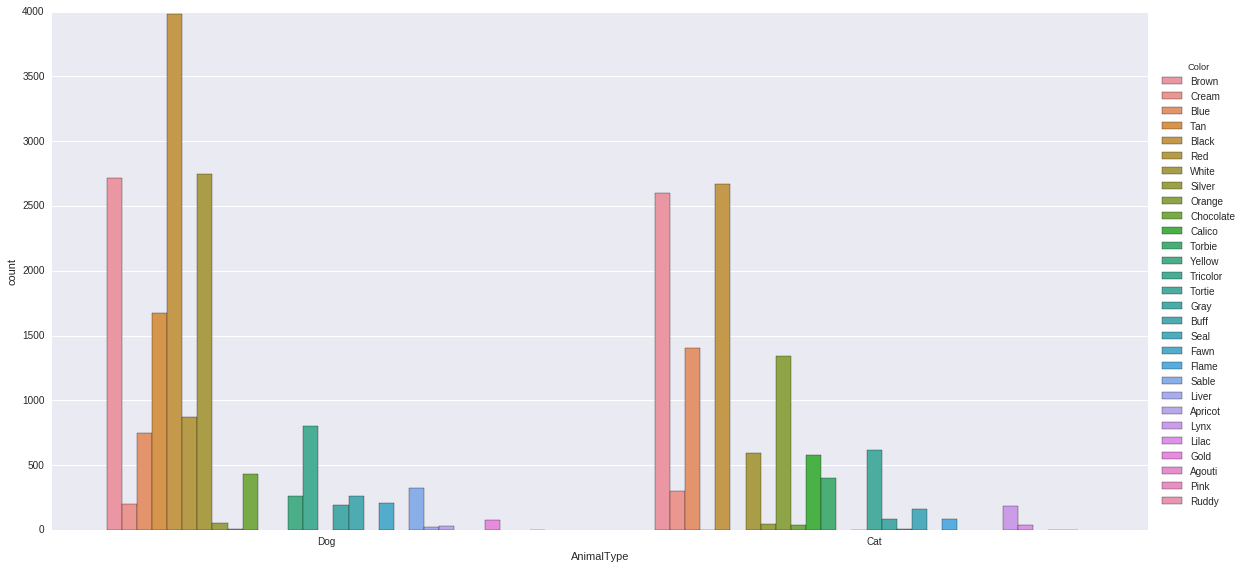

In [268]:
sns.factorplot(data=animals, x='AnimalType', hue='Color', aspect=2, kind='count', size=8)

In [269]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue
3,A683430,No name,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue
4,A667013,No name,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [270]:
def mixPure(data):
    x = str(data)
    if x.find('Mix') >= 0:
        return 'Mix Breed'
    if x.find('/') >= 0:
        return 'Mix Breed'
    else:
        return 'Purebred'
    
train['Breed'] = train.Breed.apply(mixPure)
test['Breed'] = test.Breed.apply(mixPure)

In [271]:

# functions to get new parameters from the column
def getSex(x):
    x = str(x)
    if x.find('Male') >= 0:
        return 'male'
    if x.find('Female') >= 0:
        return 'female'
    return 'unknown'
def neutered(x):
    x = str(x)
    if x.find('Spayed') >= 0 or x.find('Neutered') >= 0:
        return 'neutered'
    if x.find('Intact') >= 0:
        return 'intact'
    return 'unknown'

animals['Sex'] = animals.SexuponOutcome.apply(getSex)
animals['Neutered'] = animals.SexuponOutcome.apply(neutered)
animals = animals.drop('SexuponOutcome', axis=1)
train['Sex'] = train.SexuponOutcome.apply(getSex)
train['Neutered'] = train.SexuponOutcome.apply(neutered)
train = train.drop('SexuponOutcome', axis=1)
test['Sex'] = test.SexuponOutcome.apply(getSex)
test['Neutered'] = test.SexuponOutcome.apply(neutered)
test = test.drop('SexuponOutcome', axis=1)

In [272]:
def convertAgetoWeeks(data):
    x = str(data)
    age = int(x.split()[0])
    if x.find('year') > -1:
        return age * 52
    elif x.find('month')> -1:
        return age * 4.5
    elif x.find('week')> -1:
        return age
    elif x.find('day')> -1:
        return age * 7.
                
animals['Age in Weeks'] = animals.AgeuponOutcome.apply(convertAgetoWeeks).astype(int)
animals = animals.drop('AgeuponOutcome', axis = 1)
train['Age in Weeks'] = train.AgeuponOutcome.apply(convertAgetoWeeks).astype(int)
train = train.drop('AgeuponOutcome', axis = 1)
test['Age in Weeks'] = test.AgeuponOutcome.apply(convertAgetoWeeks).astype(int)
test = test.drop('AgeuponOutcome', axis = 1)

In [273]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,Breed,Color,Sex,Neutered,Age in Weeks
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,Unknown,Dog,Shetland Sheepdog Mix,Brown,male,neutered,52
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Domestic Shorthair Mix,Cream,female,neutered,52
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Pit Bull Mix,Blue,male,neutered,104
3,A683430,No name,2014-07-11 19:09:00,Transfer,Partner,Cat,Domestic Shorthair Mix,Blue,male,intact,3
4,A667013,No name,2013-11-15 12:52:00,Transfer,Partner,Dog,Lhasa Apso/Miniature Poodle,Tan,male,neutered,104


In [274]:
def convert_to_numeric(df):
    for col in ['Name', 'AnimalType', 'Sex',
                'Breed', 'Color', 'OutcomeType', 'Neutered']:
        if col in df.columns:
            _col = "_%s" % (col)
            values = df[col].unique()
            _values = dict(zip(values, range(len(values))))
            df[_col] = df[col].map(_values).astype(int)
            df = df.drop(col, axis = 1)
    return df

animals = convert_to_numeric(animals)
train = convert_to_numeric(train)
test = convert_to_numeric(test)

In [275]:
def fix_date_time(df):
    def extract_field(_df, start, stop):
        return _df['DateTime'].map(lambda dt: int(dt[start:stop]))
    df['Year'] = extract_field(df,0,4)
    df['Month'] = extract_field(df,5,7)
    df['Day'] = extract_field(df,8,10)
    df['Hour'] = extract_field(df,11,13)
    df['Minute'] = extract_field(df,14,16)
    
    return df.drop(['DateTime'], axis = 1)

animals = fix_date_time(animals)
train = fix_date_time(train)
test = fix_date_time(test)

In [276]:
animals.head()

,AnimalID,OutcomeSubtype,Age in Weeks,_Name,_AnimalType,_Sex,_Breed,_Color,_OutcomeType,_Neutered,Year,Month,Day,Hour,Minute
0,A671945,Unknown,52,0,0,0,0,0,0,0,2014,2,12,18,22
1,A656520,Suffering,52,1,1,1,1,1,1,0,2013,10,13,12,44
2,A686464,Foster,104,2,0,0,2,2,2,0,2015,1,31,12,28
3,A683430,Partner,3,3,1,0,1,2,3,1,2014,7,11,19,9
4,A667013,Partner,104,3,0,0,3,3,3,0,2013,11,15,12,52


In [277]:
animals = animals.drop(['OutcomeSubtype'], axis=1)
train = train.drop(['OutcomeSubtype'], axis=1)

In [278]:
animals.head()

,AnimalID,Age in Weeks,_Name,_AnimalType,_Sex,_Breed,_Color,_OutcomeType,_Neutered,Year,Month,Day,Hour,Minute
0,A671945,52,0,0,0,0,0,0,0,2014,2,12,18,22
1,A656520,52,1,1,1,1,1,1,0,2013,10,13,12,44
2,A686464,104,2,0,0,2,2,2,0,2015,1,31,12,28
3,A683430,3,3,1,0,1,2,3,1,2014,7,11,19,9
4,A667013,104,3,0,0,3,3,3,0,2013,11,15,12,52


In [279]:
train['ID'] = train['AnimalID']

In [280]:
train.drop('AnimalID', axis=1)

,Age in Weeks,_Name,_AnimalType,_Sex,_Breed,_Color,_OutcomeType,_Neutered,Year,Month,Day,Hour,Minute,ID
0,52,0,0,0,0,0,0,0,2014,2,12,18,22,A671945
1,52,1,1,1,0,1,1,0,2013,10,13,12,44,A656520
2,104,2,0,0,0,2,2,0,2015,1,31,12,28,A686464
3,3,3,1,0,0,2,3,1,2014,7,11,19,9,A683430
4,104,3,0,0,0,3,3,0,2013,11,15,12,52,A667013
5,4,4,0,1,0,4,3,1,2014,4,25,13,4,A677334
6,3,5,1,0,0,2,3,1,2015,3,28,13,11,A699218
7,3,3,1,2,0,0,3,2,2015,4,30,17,2,A701489
8,22,6,0,1,0,5,2,0,2014,2,4,17,17,A671784
9,52,3,0,1,1,6,2,0,2014,5,3,7,48,A677747


In [281]:
train = train.reindex(columns= ['ID', 'Age in Weeks', '_Name', '_AnimalType',
                               '_Sex', '_Breed', '_Color', '_Neutered', 'Year',
                               'Month', 'Day', 'Hour','Minute', '_OutcomeType'])

In [282]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 14 columns):
ID              26729 non-null object
Age in Weeks    26729 non-null int64
_Name           26729 non-null int64
_AnimalType     26729 non-null int64
_Sex            26729 non-null int64
_Breed          26729 non-null int64
_Color          26729 non-null int64
_Neutered       26729 non-null int64
Year            26729 non-null int64
Month           26729 non-null int64
Day             26729 non-null int64
Hour            26729 non-null int64
Minute          26729 non-null int64
_OutcomeType    26729 non-null int64
dtypes: int64(13), object(1)
memory usage: 2.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11456 entries, 0 to 11455
Data columns (total 13 columns):
ID              11456 non-null int64
Age in Weeks    11456 non-null int64
_Name           11456 non-null int64
_AnimalType     11456 non-null int64
_Sex            11456 non-null int64
_Breed          11456 non-n

In [286]:
trainOutcome = train['_OutcomeType']

In [288]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    train, trainOutcome, test_size=0.35, random_state=100)